In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import skew, boxcox


In [ ]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1wMapByTvMFt16zz9Bd2643eTHJXtEhnX")
df


Mounted at /content/drive


In [ ]:
df.dtypes


,0
Date,object
Sales,float64
TV_Spend,float64
Radio_Spend,float64
Digital_Spend,float64
OOH_Spend,float64
Competitor_Price,float64
Promo_Flag,object
Region,object


### Presença de Valores Nulos
Alternativas para solução:
- Retirar Valores
- Substituir pela Média
- v

In [ ]:
df.isnull().sum()


,0
Date,0
Sales,50
TV_Spend,50
Radio_Spend,50
Digital_Spend,0
OOH_Spend,0
Competitor_Price,0
Promo_Flag,0
Region,0


In [ ]:
df.count()


,0
Date,1000
Sales,950
TV_Spend,950
Radio_Spend,950
Digital_Spend,1000
OOH_Spend,1000
Competitor_Price,1000
Promo_Flag,1000
Region,1000


In [ ]:
# Substituindo pela média
df['TV_Spend'] = df['TV_Spend'].fillna(df['TV_Spend'].mean())
df['Radio_Spend'] = df['Radio_Spend'].fillna(df['Radio_Spend'].mean())
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())


In [ ]:
df.isnull().sum()


,0
Date,0
Sales,0
TV_Spend,0
Radio_Spend,0
Digital_Spend,0
OOH_Spend,0
Competitor_Price,0
Promo_Flag,0
Region,0


In [ ]:
df.count()


,0
Date,1000
Sales,1000
TV_Spend,1000
Radio_Spend,1000
Digital_Spend,1000
OOH_Spend,1000
Competitor_Price,1000
Promo_Flag,1000
Region,1000


### Tratando Outliers

(array([197., 222., 270., 217.,  89.,   0.,   0.,   0.,   0.,   5.]),
 array([  892.82813032,  2050.44153719,  3208.05494407,  4365.66835094,
         5523.28175781,  6680.89516468,  7838.50857155,  8996.12197843,
        10153.7353853 , 11311.34879217, 12468.96219904]),
 <BarContainer object of 10 artists>)

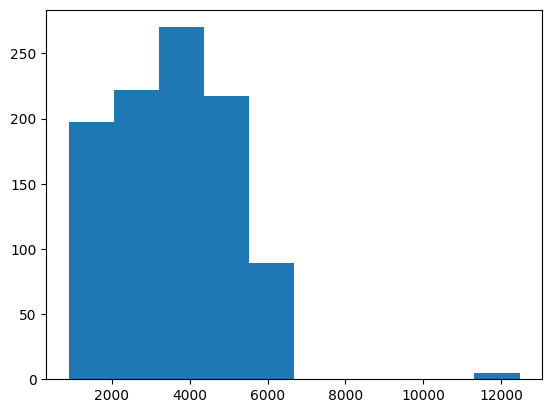

In [ ]:
plt.hist(x = df['Sales'])


(array([200., 729.,  68.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([ 2059.61136534,  4311.58249916,  6563.55363298,  8815.5247668 ,
        11067.49590062, 13319.46703444, 15571.43816826, 17823.40930207,
        20075.38043589, 22327.35156971, 24579.32270353]),
 <BarContainer object of 10 artists>)

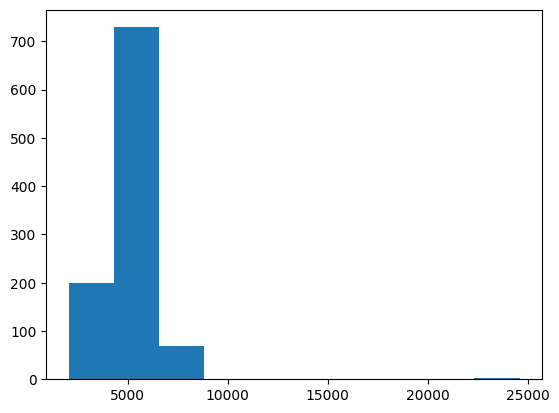

In [ ]:
plt.hist(x = df['TV_Spend'])


(array([  9.,  19.,  76., 146., 284., 225., 139.,  75.,  20.,   7.]),
 array([1991.63130678, 2404.10484483, 2816.57838289, 3229.05192094,
        3641.52545899, 4053.99899705, 4466.4725351 , 4878.94607316,
        5291.41961121, 5703.89314927, 6116.36668732]),
 <BarContainer object of 10 artists>)

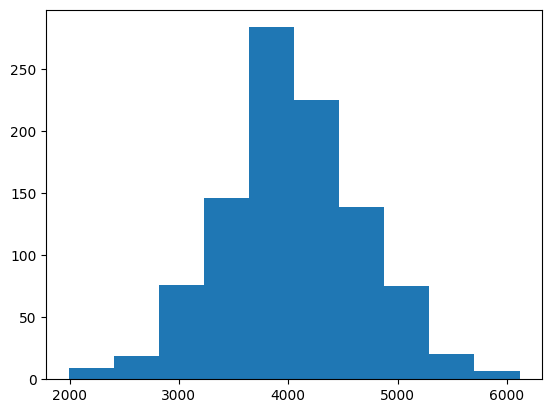

In [ ]:
plt.hist(x = df['Radio_Spend'])


(array([ 10.,  45., 101., 176., 220., 227., 138.,  60.,  20.,   3.]),
 array([ 656.441048  , 1150.24438077, 1644.04771353, 2137.8510463 ,
        2631.65437907, 3125.45771184, 3619.2610446 , 4113.06437737,
        4606.86771014, 5100.67104291, 5594.47437568]),
 <BarContainer object of 10 artists>)

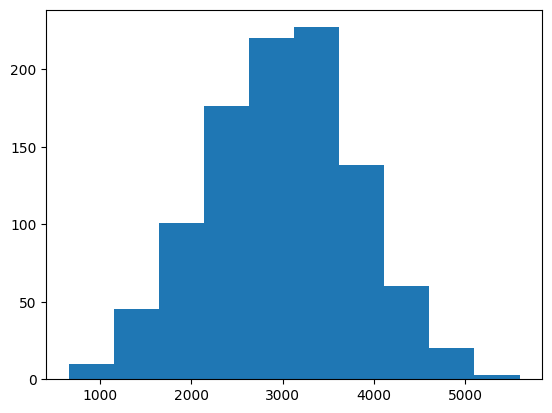

In [ ]:
plt.hist(x = df['Digital_Spend'])


(array([ 11.,  27.,  69., 151., 238., 241., 173.,  70.,  15.,   5.]),
 array([ 229.31847472,  480.90303529,  732.48759586,  984.07215643,
        1235.656717  , 1487.24127757, 1738.82583814, 1990.41039871,
        2241.99495928, 2493.57951985, 2745.16408042]),
 <BarContainer object of 10 artists>)

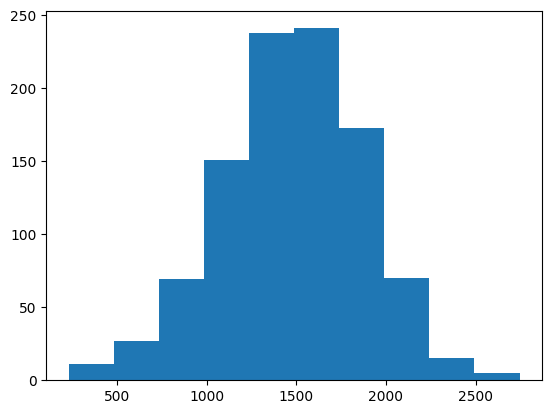

In [ ]:
plt.hist(x = df['OOH_Spend'])


(array([  9.,  35.,  76., 163., 199., 205., 167., 107.,  26.,  13.]),
 array([ 67.3624306 ,  71.77127432,  76.18011804,  80.58896175,
         84.99780547,  89.40664919,  93.81549291,  98.22433662,
        102.63318034, 107.04202406, 111.45086778]),
 <BarContainer object of 10 artists>)

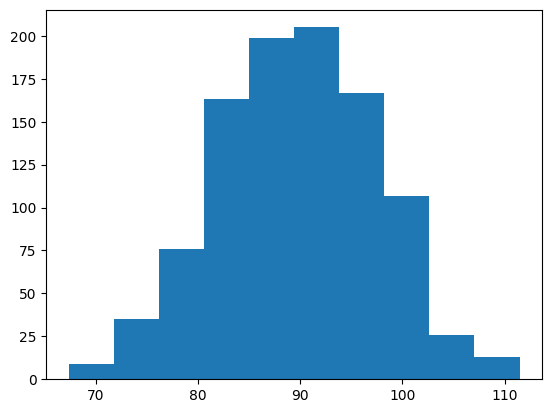

In [ ]:
plt.hist(x = df['Competitor_Price'])


(array([808.,   0.,   0.,   0.,   0., 182.,   0.,   0.,   0.,  10.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

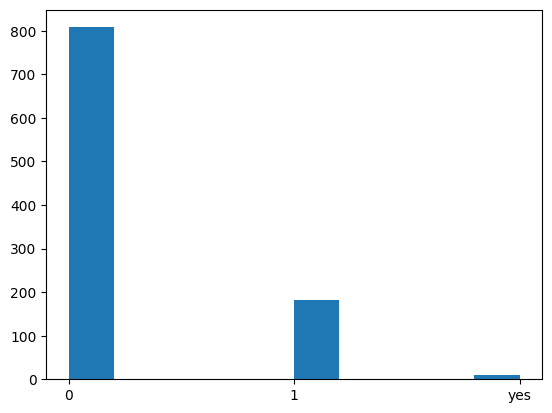

In [ ]:
plt.hist(x = df['Promo_Flag'])


(array([245.,   0., 235.,   0., 249.,   0., 263.,   0.,   5.,   3.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

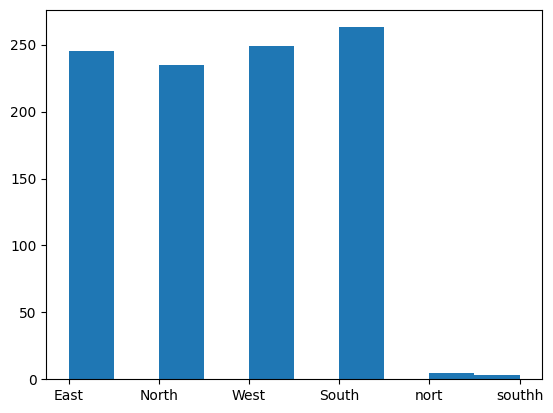

In [ ]:
plt.hist(x = df['Region'])


In [ ]:
df[df["Sales"] >= 10000]


,Date,Sales,TV_Spend,Radio_Spend,Digital_Spend,OOH_Spend,Competitor_Price,Promo_Flag,Region
35,2023-09-03,12468.962199,6573.986763,5772.290070,3357.498001,1882.681275,111.271810,0,South
216,2027-02-21,12468.962199,4326.509376,3464.889705,1674.701434,2242.658975,97.134824,0,West
473,2032-01-25,12468.962199,5014.688195,3594.499536,2151.515947,1717.688141,88.039011,0,North
515,2032-11-14,12468.962199,4878.252492,4025.315352,3380.344546,1134.875632,82.105151,0,West
877,2039-10-23,12468.962199,4790.778126,4042.674149,3194.403778,1672.886676,84.363890,0,South


In [ ]:
df[df["TV_Spend"] >= 20000]


,Date,Sales,TV_Spend,Radio_Spend,Digital_Spend,OOH_Spend,Competitor_Price,Promo_Flag,Region
177,2026-05-24,2071.289653,24579.322704,3996.418398,2598.878282,1622.792429,87.194908,0,South
386,2030-05-26,3040.032433,24579.322704,4711.924559,2347.026204,1225.488346,99.035079,0,East
768,2037-09-20,3543.527772,24579.322704,3918.993991,3531.762196,1911.765240,85.665377,0,West


In [ ]:
media = df['Sales'].mean()
print(f"Média: {media}")


Média: 3543.527771633722


In [ ]:
media = df['TV_Spend'].mean()
print(f"Média: {media}")


Média: 5139.619781506285


In [ ]:
# Exportar Excel
from google.colab import files
df.to_excel('tratamento.xlsx', index=False)
files.download('tratamento.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Importar Excel
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Tratamento.xlsx')
df


,Date,Sales,TV_Spend,Radio_Spend,Digital_Spend,OOH_Spend,Competitor_Price,Promo_Flag,Region
0,2023-01-01,1024.835708,6399.355437,4637.059779,1473.753954,1154.602558,97.881202,0,East
1,2023-01-08,1022.194121,5924.633683,4511.424609,2311.691991,1487.518604,97.712929,0,North
2,2023-01-15,1090.247560,5059.630370,3798.052246,2669.115573,1507.206749,90.981784,0,West
3,2023-01-22,1162.072470,4353.063222,3519.449474,4510.150126,1689.052138,98.289549,0,West
4,2023-01-29,1101.236966,5698.223314,3850.849588,3445.242500,953.256655,103.584145,1,South
...,...,...,...,...,...,...,...,...,...
995,2042-01-26,3543.527772,6070.150238,4665.334299,3022.766065,1480.413988,80.957347,0,East
996,2042-02-02,6234.481100,4973.478741,4061.413006,1337.750544,1784.564232,85.843241,0,South
997,2042-02-09,6194.133348,4118.125349,3098.347037,2743.761756,2745.164080,73.972981,0,East
998,2042-02-16,6148.444299,4836.933036,4002.412747,4314.702525,1823.214476,82.379752,0,West


(array([ 80.,  95., 107.,  96., 161., 102.,  99., 106.,  97.,  57.]),
 array([ 892.82813032, 1426.99342724, 1961.15872416, 2495.32402108,
        3029.489318  , 3563.65461492, 4097.81991184, 4631.98520876,
        5166.15050568, 5700.3158026 , 6234.48109952]),
 <BarContainer object of 10 artists>)

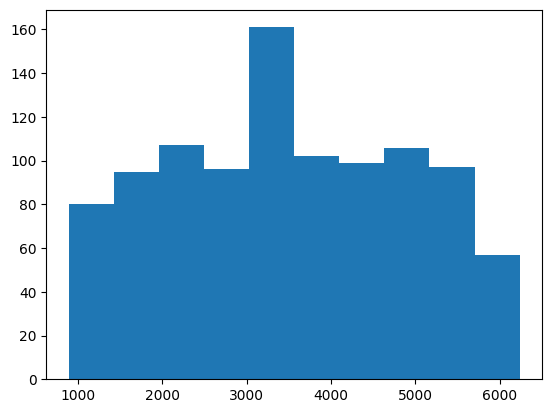

In [ ]:
plt.hist(x = df['Sales'])


(array([ 12.,  24.,  69., 159., 234., 268., 140.,  66.,  23.,   5.]),
 array([2059.61136534, 2672.96098559, 3286.31060584, 3899.66022609,
        4513.00984634, 5126.35946659, 5739.70908684, 6353.05870709,
        6966.40832734, 7579.75794759, 8193.10756784]),
 <BarContainer object of 10 artists>)

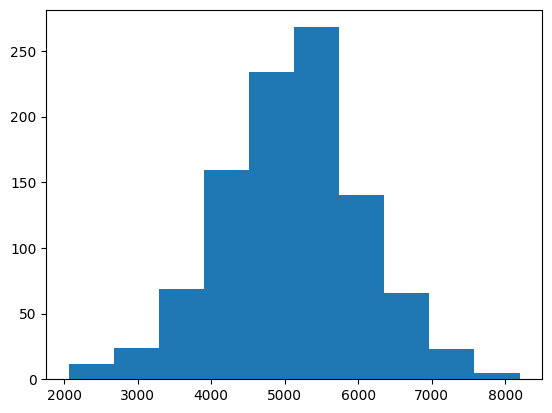

In [ ]:
plt.hist(x = df['TV_Spend'])


In [ ]:
df.count()


,0
Date,1000
Sales,1000
TV_Spend,1000
Radio_Spend,1000
Digital_Spend,1000
OOH_Spend,1000
Competitor_Price,1000
Promo_Flag,1000
Region,1000


### Logaritmizar
Análise de Skewness (assimetria)

• Entre -0.5 e +0.5 = Distribuição aproximadamente simétrica (Não precisa logaritimizar)

• Entre ±0.5 e ±1 = Assimetria moderada (Avaliar log, opcional)

• Maior que +1 ou menor que -1 = Forte assimetria (Recomenda-se logaritmizar)

In [ ]:
df['Sales'].skew() # Simetrica


np.float64(0.009377372816732772)

In [ ]:
df['TV_Spend'].skew() # Simetrica


np.float64(-0.07427931817394613)

In [ ]:
df['Radio_Spend'].skew() # Simetrica


np.float64(-0.020356779140910174)

In [ ]:
df['OOH_Spend'].skew() # Simetrica


np.float64(-0.17580095096716147)

In [ ]:
df['Competitor_Price'].skew() # Simetrica


np.float64(-0.019835143557796316)

### Alteração do tipo primitivo

In [ ]:
df[df["Promo_Flag"] == "yes"]


,Date,Sales,TV_Spend,Radio_Spend,Digital_Spend,OOH_Spend,Competitor_Price,Promo_Flag,Region
16,2023-04-23,1216.361693,4348.581996,3529.794745,1784.523140,1307.666484,89.156252,yes,South
47,2023-11-26,1174.243162,3423.607843,3051.374609,2730.996209,2625.861778,98.949826,yes,North
61,2024-03-03,1472.808256,2151.457379,2249.662891,2733.711676,1611.707135,104.014559,yes,East
68,2024-04-21,1545.085050,4532.298799,4146.203720,3180.211294,1024.307014,98.537197,yes,North
161,2026-02-01,1957.967180,7290.942573,4042.674149,3364.723356,1691.930814,86.406800,yes,North
365,2029-12-30,2829.046312,5139.619782,4365.000569,4562.607310,2339.175736,85.212767,yes,North
658,2035-08-12,4135.307465,3993.457435,3447.626263,3128.391699,1598.433446,93.732337,yes,South
710,2036-08-10,4395.954100,6107.080669,4418.719802,1851.272381,1256.659694,86.235082,yes,North
829,2038-11-21,5059.989792,5018.849623,3901.357668,3384.726474,1079.750671,90.230662,yes,East
870,2039-09-04,5142.610864,3894.295332,3145.384875,1887.822460,2730.744148,79.422295,yes,South


In [ ]:
df['Promo_Flag'] = df['Promo_Flag'].replace({'yes': 1})


In [ ]:
df.head(10)


,Date,Sales,TV_Spend,Radio_Spend,Digital_Spend,OOH_Spend,Competitor_Price,Promo_Flag,Region
0,2023-01-01,1024.835708,6399.355437,4637.059779,1473.753954,1154.602558,97.881202,0,East
1,2023-01-08,1022.194121,5924.633683,4511.424609,2311.691991,1487.518604,97.712929,0,North
2,2023-01-15,1090.247560,5059.630370,3798.052246,2669.115573,1507.206749,90.981784,0,West
3,2023-01-22,1162.072470,4353.063222,3519.449474,4510.150126,1689.052138,98.289549,0,West
4,2023-01-29,1101.236966,5698.223314,3850.849588,3445.242500,953.256655,103.584145,1,South
5,2023-02-05,1126.906101,5393.485385,4300.079343,1931.614745,1737.026910,93.528839,0,East
6,2023-02-12,1241.585172,5895.193220,4042.674149,3388.829032,418.243347,105.122413,0,East
7,2023-02-19,1223.073886,5635.171802,4135.976492,1762.156809,1248.046179,102.298874,0,East
8,2023-02-26,1181.123054,5139.619782,4827.505330,3866.152843,1304.690463,96.168833,0,North
9,2023-03-05,1249.219207,4464.764788,3960.129914,2623.100279,1753.330730,99.112352,0,South


In [ ]:
df[df["Region"] == "nort"]


,Date,Sales,TV_Spend,Radio_Spend,Digital_Spend,OOH_Spend,Competitor_Price,Promo_Flag,Region
309,2028-12-03,2463.969390,5474.698233,4551.115567,2999.749062,1314.167569,88.926296,0,nort
348,2029-09-02,2517.074540,3633.121302,3387.916455,3543.145032,1123.840433,83.045555,0,nort
411,2030-11-17,2885.154946,5556.230009,4795.117581,2677.539209,1475.569731,89.162120,1,nort
527,2033-02-06,3787.106397,6543.243528,5108.001295,4654.325071,1805.544141,89.525217,0,nort
894,2040-02-19,5726.111198,4911.637041,4099.462816,2685.557794,1074.311997,84.374813,0,nort


In [ ]:
df['Region'] = df['Region'].replace({'nort': "North"})


In [ ]:
df[df["Region"] == "southh"]


,Date,Sales,TV_Spend,Radio_Spend,Digital_Spend,OOH_Spend,Competitor_Price,Promo_Flag,Region
395,2030-07-28,2837.928268,5184.680306,3675.914618,1891.209646,956.992984,96.115774,1,southh
787,2038-01-31,5107.661154,4247.843594,3159.871157,2291.801051,1239.736069,93.971228,0,southh
948,2041-03-03,5936.262474,6126.050251,4619.561303,2776.005359,1345.730948,72.706183,0,southh


In [ ]:
df['Region'] = df['Region'].replace({'southh': "South"})


In [ ]:
np.unique(df['Region'])


array(['East', 'North', 'South', 'West'], dtype=object)

In [ ]:
df.count()


,0
Date,1000
Sales,1000
TV_Spend,1000
Radio_Spend,1000
Digital_Spend,1000
OOH_Spend,1000
Competitor_Price,1000
Promo_Flag,1000
Region,1000


### Multicolinearidade das Variáveis:

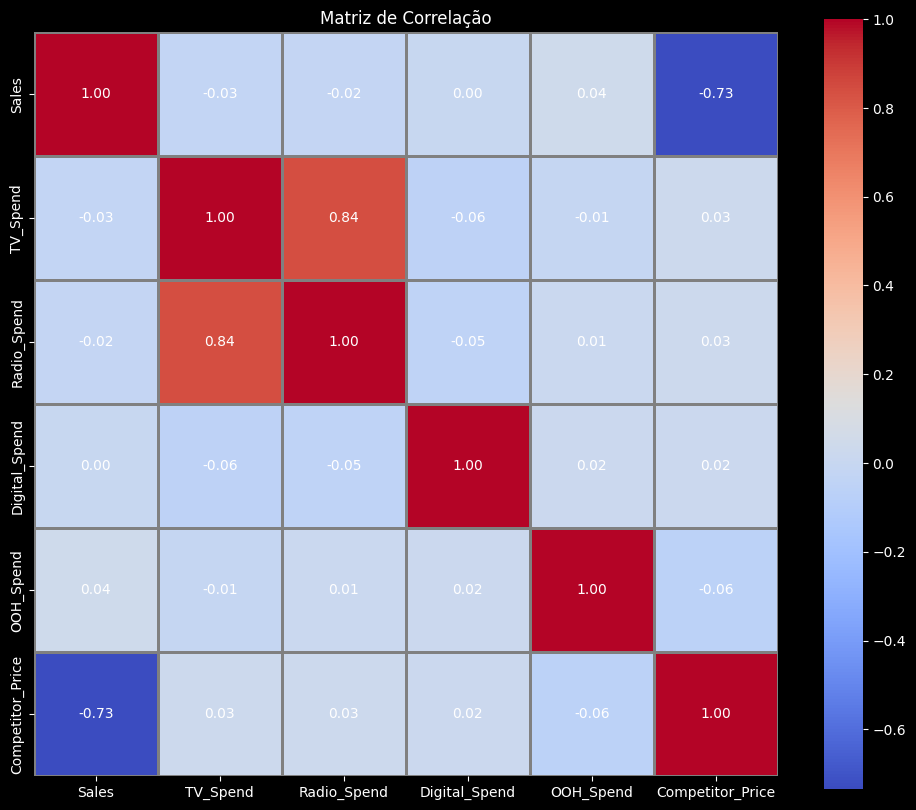

In [ ]:
corr = df.corr(numeric_only=True)

plt.style.use('dark_background')
plt.figure(figsize=(12, 10))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=1.0,
    linecolor='gray',
    cbar=True,
    square=True,
    annot_kws={"color": "white"},
    mask=corr.isnull()
)

plt.title('Matriz de Correlação')
plt.show()


### Matriz de Dispersão

In [ ]:
grafico = px.scatter_matrix(df, dimensions=['Sales', 'TV_Spend', 'Radio_Spend', 'Digital_Spend', 'OOH_Spend', 'Competitor_Price'], color = 'Sales')
grafico.update_layout(
    width=1200,
    height=900,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white')
grafico.show()


In [ ]:
# Exportar CSV
from google.colab import files
df.to_csv('mock_marketing_dataset_Parte_1.csv', index=False)
files.download('mock_marketing_dataset_Parte_1.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Exportar Excel
from google.colab import files
df.to_excel('mock_marketing_dataset_Parte_1.xlsx', index=False)
files.download('mock_marketing_dataset_Parte_1.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Parte 2 - Modelagem Marketing Mix Modeling (MMM) com Google Meridian

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.6/229.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.0/886.0 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: natsort
    Found existing installation: natsort 8.4.0
    Uninstalling natsort-8.4.0:
      Successfully uninstalled natsort-8.4.0


In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
import arviz as az
import IPython


In [ ]:
from meridian import constants
from meridian.analysis import analyzer
from meridian.data import load
from meridian.analysis import formatter
from meridian.analysis import optimizer
from meridian.analysis import summarizer
from meridian.analysis import visualizer
from meridian.data import data_frame_input_data_builder
from meridian.data import test_utils
from meridian.model import model
from meridian.model import prior_distribution
from meridian.model import spec


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
print("GPUs Available:", len(tf.config.list_physical_devices("GPU")))
print('CPUs Available:', len(tf.config.list_physical_devices("CPU")))


Your runtime has 13.6 gigabytes of available RAM

GPUs Available: 0
CPUs Available: 1


# Mapeamento dos Dados


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [ ]:
df3 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/mock_marketing_dataset_Parte_1.xlsx')
df3


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/mock_marketing_dataset_Parte_1.xlsx'

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mock_marketing_dataset_Parte_1.csv', header=0, sep=',')
df2


,Date,Sales,TV_Spend,Radio_Spend,Digital_Spend,OOH_Spend,Competitor_Price,Promo_Flag,Region
0,2023-01-01,1024.835708,6399.355437,4637.059779,1473.753954,1154.602558,97.881202,0,East
1,2023-01-08,1022.194121,5924.633683,4511.424609,2311.691991,1487.518604,97.712929,0,North
2,2023-01-15,1090.247560,5059.630370,3798.052246,2669.115573,1507.206749,90.981784,0,West
3,2023-01-22,1162.072470,4353.063222,3519.449474,4510.150126,1689.052138,98.289549,0,West
4,2023-01-29,1101.236966,5698.223314,3850.849588,3445.242500,953.256655,103.584145,1,South
...,...,...,...,...,...,...,...,...,...
995,2042-01-26,3543.527772,6070.150238,4665.334299,3022.766065,1480.413988,80.957347,0,East
996,2042-02-02,6234.481100,4973.478741,4061.413006,1337.750544,1784.564232,85.843241,0,South
997,2042-02-09,6194.133348,4118.125349,3098.347037,2743.761756,2745.164080,73.972981,0,East
998,2042-02-16,6148.444299,4836.933036,4002.412747,4314.702525,1823.214476,82.379752,0,West


In [ ]:
df2.dtypes


,0
Date,object
Sales,float64
TV_Spend,float64
Radio_Spend,float64
Digital_Spend,float64
OOH_Spend,float64
Competitor_Price,float64
Promo_Flag,int64
Region,object


In [ ]:
df2.count()


,0
Date,1000
Sales,1000
TV_Spend,1000
Radio_Spend,1000
Digital_Spend,1000
OOH_Spend,1000
Competitor_Price,1000
Promo_Flag,1000
Region,1000


- Variável temporal (Date — tipo object, pode ser convertido para datetime).
- Variável de resultado (Sales — vendas, tipo float64).
- Variáveis de investimento (TV_Spend, Radio_Spend, Digital_Spend, OOH_Spend).
- Fatores externos (Competitor_Price e Promo_Flag).
- Regiões (Region e dummies como Region_East, Region_North, etc.).



# Criando Modelo

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mock_marketing_dataset_Parte_1.csv")
dates_per_region = df2.groupby("Region")["Date"].unique()
for region, dates in dates_per_region.items():
    print(f"Região: {region}, nº de datas únicas: {len(dates)}")


Região: East, nº de datas únicas: 245
Região: North, nº de datas únicas: 240
Região: South, nº de datas únicas: 266
Região: West, nº de datas únicas: 249


In [ ]:
df2


,Date,Sales,TV_Spend,Radio_Spend,Digital_Spend,OOH_Spend,Competitor_Price,Promo_Flag,Region
0,2023-01-01,1024.835708,6399.355437,4637.059779,1473.753954,1154.602558,97.881202,0,East
1,2023-01-08,1022.194121,5924.633683,4511.424609,2311.691991,1487.518604,97.712929,0,North
2,2023-01-15,1090.247560,5059.630370,3798.052246,2669.115573,1507.206749,90.981784,0,West
3,2023-01-22,1162.072470,4353.063222,3519.449474,4510.150126,1689.052138,98.289549,0,West
4,2023-01-29,1101.236966,5698.223314,3850.849588,3445.242500,953.256655,103.584145,1,South
...,...,...,...,...,...,...,...,...,...
995,2042-01-26,3543.527772,6070.150238,4665.334299,3022.766065,1480.413988,80.957347,0,East
996,2042-02-02,6234.481100,4973.478741,4061.413006,1337.750544,1784.564232,85.843241,0,South
997,2042-02-09,6194.133348,4118.125349,3098.347037,2743.761756,2745.164080,73.972981,0,East
998,2042-02-16,6148.444299,4836.933036,4002.412747,4314.702525,1823.214476,82.379752,0,West


In [ ]:
coord_to_columns = load.CoordToColumns(
    time="Date",
    geo="Region",
    kpi= "Sales",
    media=["TV_Spend", "Radio_Spend", "Digital_Spend", "OOH_Spend"],
    media_spend=["TV_Spend", "Radio_Spend", "Digital_Spend", "OOH_Spend"],
non_media_treatments="Promo_Flag",
    controls="Competitor_Price",
)


In [ ]:
correct_media_to_channel = {
    "TV_Spend": "TV",
    "Radio_Spend": "Radio",
    "Digital_Spend": "Digital",
    "OOH_Spend": "OOH",
}

correct_media_spend_to_channel = {
    "TV_Spend": "TV",
    "Radio_Spend": "Radio",
    "Digital_Spend": "Digital",
    "OOH_Spend": "OOH",
}


In [ ]:
loader = load.DataFrameDataLoader(
    df=df3,
    kpi_type = "Sales",
    coord_to_columns=coord_to_columns,
    media_to_channel=correct_media_to_channel,
    media_spend_to_channel=correct_media_spend_to_channel,
)
data = loader.load()


NameError: name 'df3' is not defined

In [ ]:
# Verificar os valores únicos de Date por Region
for region in df2['Region'].unique():
    dates = df2.loc[df2['Region'] == region, 'Date'].unique()
    print(f"Region: {region}, Dates: {sorted(dates)}")


Region: East, Dates: [Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-08 00:00:00'), Timestamp('2023-01-15 00:00:00'), Timestamp('2023-01-22 00:00:00'), Timestamp('2023-01-29 00:00:00'), Timestamp('2023-02-05 00:00:00'), Timestamp('2023-02-12 00:00:00'), Timestamp('2023-02-19 00:00:00'), Timestamp('2023-02-26 00:00:00'), Timestamp('2023-03-05 00:00:00'), Timestamp('2023-03-12 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-03-26 00:00:00'), Timestamp('2023-04-02 00:00:00'), Timestamp('2023-04-09 00:00:00'), Timestamp('2023-04-16 00:00:00'), Timestamp('2023-04-23 00:00:00'), Timestamp('2023-04-30 00:00:00'), Timestamp('2023-05-07 00:00:00'), Timestamp('2023-05-14 00:00:00'), Timestamp('2023-05-21 00:00:00'), Timestamp('2023-05-28 00:00:00'), Timestamp('2023-06-04 00:00:00'), Timestamp('2023-06-11 00:00:00'), Timestamp('2023-06-18 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-07-02 00:00:00'), Timestamp('2023-07-09 00:00:00'), Timestamp('2023-07-16 00:0

In [33]:
# Índice com as combinações possíveis
all_dates = sorted(df2['Date'].unique())
all_regions = df2['Region'].unique()

# Cria o MultiIndex para todas as combinações Region x Date
index = pd.MultiIndex.from_product([all_regions, all_dates], names=['Region', 'Date'])

# Reindexa o DataFrame para garantir que todas as combinações existam
df2 = df2.set_index(['Region', 'Date']).reindex(index).reset_index()


In [ ]:
# Padronizar a coluna Date para datetime
df2['Date'] = pd.to_datetime(df2['Date'])


In [ ]:
loader = load.DataFrameDataLoader(
    df=df2,
    kpi_type = "Sales",
    coord_to_columns=coord_to_columns,
    media_to_channel=correct_media_to_channel,
    media_spend_to_channel=correct_media_spend_to_channel,
)
data = loader.load()


ValueError: Population is required for non national models.

In [ ]:
# Verificando se é problema na leitura das colunas - Hipótese negada
print(df2.columns.tolist())


['Region', 'Date', 'Sales', 'TV_Spend', 'Radio_Spend', 'Digital_Spend', 'OOH_Spend', 'Competitor_Price', 'Promo_Flag']


In [ ]:
# Verificando se há colunas duplicadas - Hipótese negada
dups = df2.columns[df2.columns.duplicated()]
print(dups)


Index([], dtype='object')


In [ ]:
roi_mu = 0.2  # Mu for ROI prior for each media channel.
roi_sigma = 0.9  # Sigma for ROI prior for each media channel.
prior = prior_distribution.PriorDistribution(
    roi_m=tfp.distributions.LogNormal(roi_mu, roi_sigma, name=constants.ROI_M)
)
model_spec = spec.ModelSpec(prior=prior)

mmm = model.Meridian(input_data=data, model_spec=model_spec)


In [ ]:
%%time
mmm.sample_prior(500)
mmm.sample_posterior(
    n_chains=10, n_adapt=2000, n_burnin=500, n_keep=1000, seed=1
)


In [ ]:
model_fit = visualizer.ModelFit(mmm)
model_fit.plot_model_fit()


In [ ]:
mmm_summarizer = summarizer.Summarizer(mmm)


In [ ]:
IPython.display.HTML(filename='/content/drive/MyDrive/summary_output.html')
